### Import

In [238]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from mpl_toolkits import mplot3d

### Fonts

In [239]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Columns in data
1. menopaus	<br>0 = premenopausal; 1 = postmenopausal or age>=55 ; 9 = unknown
2. agegrp <br> 1 = 35-39; 2 = 40-44; 3 = 45-49; 4 = 50-54; 5 = 55-59; 6 = 60-64; 7 = 65-69; 8 = 70-74; 9 = 75-79; 10 = 80-84
3. density<br> BI-RADS breast density codes 1 = Almost entirely fat; 2 = Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Unknown or different measurement system
4. race<br> 1 = white; 2 = Asian/Pacific Islander; 3 = black; 4 = Native American; 5 = other/mixed; 9 = unknown
5. Hispanic<br> 0 = no; 1 = yes; 9 = unknown
6. bmi<br> Body mass index: 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = unknown
7. agefirst<br> Age at first birth: 0 = Age < 30; 1 = Age 30 or greater; 2 = Nulliparous; 9 = unknown
8. nrelbc<br> Number of first degree relatives with breast cancer: 0 = zero; 1= one; 2 = 2 or more; 9 = unknown
9. brstproc<br> Previous breast procedure: 0 = no; 1 = yes; 9 = unknown
10. lastmamm<br>Result of last mammogram before the index mammogram: 0 = negative; 1 = false positive; 9 = unknown
11. surgmeno<br>Surgical menopause: 0 = natural; 1 = surgical; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)
12. hrt<br> Current hormone therapy: 0 = no; 1 = yes; 9 = unknown or not menopausal (menopaus=0 or menopaus=9)
13. invasive<br> Diagnosis of invasive breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes
14. cancer<br>Diagnosis of invasive or ductal carcinoma in situ breast cancer within one year of the index screening mammogram: 0 = no; 1 = yes
15. training	30	Training data: 0 = no (validation); 1 = yes (training)

In [240]:
columns = ["menopaus",
           "agegrp",
           "density",
           "race",
           "hispanic",
           "bmi",
           "agefirst",
           "nrelbc",
           "brstproc",
           "lastmamm",
           "surgmeno",
           "hrt",
           "invasive",
           "cancer",
           "training"]

### Load Data

In [246]:
data1 = pd.read_csv('../../data/cancer_risk_factors/risk_1.txt',header=None,delimiter='\t')
data2 = pd.read_csv('../../data/cancer_risk_factors/risk_2.txt',header=None,delimiter='\t')
data = pd.concat((data1,data2))
X = data.values
ycan = X[:,-2]
yinv = X[:,-3]
X = X[:,:-3].astype('float')

### Balance

In [247]:
idx0 = np.where((ycan == 0))[0]
idx1 = np.where((ycan == 1))[0]
no_elem = np.min([len(idx0),len(idx1)])
randperm0 = np.random.permutation(len(idx0))
randperm1 = np.random.permutation(len(idx1))
idx0 = idx0[randperm0]
idx1 = idx1[randperm1]
idx0 = idx0[:no_elem]
idx1 = idx1[:no_elem]
data0 = X[idx0,:]
data1 = X[idx1,:]
ycan0 = data0[:,0]
ycan1 = data1[:,0]
ycan0[:] = 0
ycan1[:] = 1
X = np.vstack((data0,data1))
ycan = np.hstack((ycan0,ycan1))
randval = np.random.permutation(X.shape[0])
X = X[randval,:]
ycan = ycan[randval]

### Divide

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, ycan, test_size=0.20, random_state=42)
print(np.mean(y_train))

0.5002879211326433


### Create MLP

In [249]:
mlp = MLPClassifier(activation='relu',verbose=1,learning_rate_init=0.0001, max_iter=100,hidden_layer_sizes=(10,2))
mlp.fit(X_train, y_train);

Iteration 1, loss = 0.83074914
Iteration 2, loss = 0.73964768
Iteration 3, loss = 0.62549002
Iteration 4, loss = 0.42301372
Iteration 5, loss = 0.22733948
Iteration 6, loss = 0.06411872
Iteration 7, loss = 0.02426377
Iteration 8, loss = 0.01034738
Iteration 9, loss = 0.00464439
Iteration 10, loss = 0.00214477
Iteration 11, loss = 0.00100968
Iteration 12, loss = 0.00048327
Iteration 13, loss = 0.00023582
Iteration 14, loss = 0.00011834
Iteration 15, loss = 0.00006220
Iteration 16, loss = 0.00003528
Iteration 17, loss = 0.00002237
Iteration 18, loss = 0.00001620
Iteration 19, loss = 0.00001326
Iteration 20, loss = 0.00001186
Iteration 21, loss = 0.00001117
Iteration 22, loss = 0.00001076
Iteration 23, loss = 0.00001040
Iteration 24, loss = 0.00000995
Iteration 25, loss = 0.00000944
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


### Plot Performance Metrics

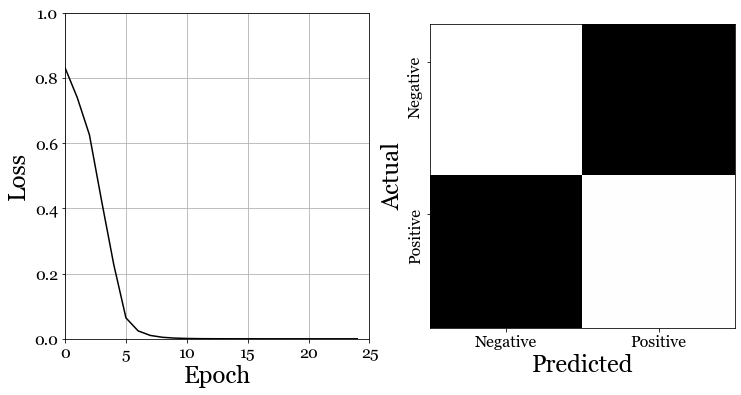

In [251]:
y_pred = mlp.predict(X_test)
C = confusion_matrix(y_test,y_pred)
loss = mlp.loss_curve_

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(loss,'k')
plt.grid()
plt.xticks(np.linspace(0,25,6),np.linspace(0,25,6).astype(int),**csfont,fontsize=16)
plt.yticks(np.linspace(0,1,6),np.round(np.linspace(0,1,6),2),**csfont,fontsize=16)
plt.xlabel('Epoch',**csfont,fontsize=24)
plt.ylabel('Loss',**csfont,fontsize=24)
plt.axis((0,25,0,1))
plt.subplot(1,2,2)
plt.imshow(C,cmap='gray')
plt.xticks(np.linspace(0,1,2),['Negative','Positive'],**csfont,fontsize=16)
plt.yticks(np.linspace(-0.25,0.75,2),['Negative','Positive'],rotation=90,**csfont,fontsize=16)
plt.xlabel('Predicted',**csfont,fontsize=24);
plt.ylabel('Actual',**csfont,fontsize=24);

### Get Activations

In [252]:
def get_activations(clf, X):

    hidden_layer_sizes = clf.hidden_layer_sizes
    if not hasattr(hidden_layer_sizes, "__iter__"):
        hidden_layer_sizes = [hidden_layer_sizes]
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X.shape[1]] + hidden_layer_sizes + \
        [clf.n_outputs_]
    activations = [X]
    for i in range(clf.n_layers_ - 1):
        activations.append(np.empty((X.shape[0],
                                     layer_units[i + 1])))
    clf._forward_pass(activations)
    return activations

### Plot the activity of the last hidden layer

In [253]:
yprob = mlp.predict_proba(X_test)
A = get_activations(mlp,X_test)
S = A[1]
print(X_test.shape)
len(np.where(S[:,0] == 0)[0])

(65122, 13)


0

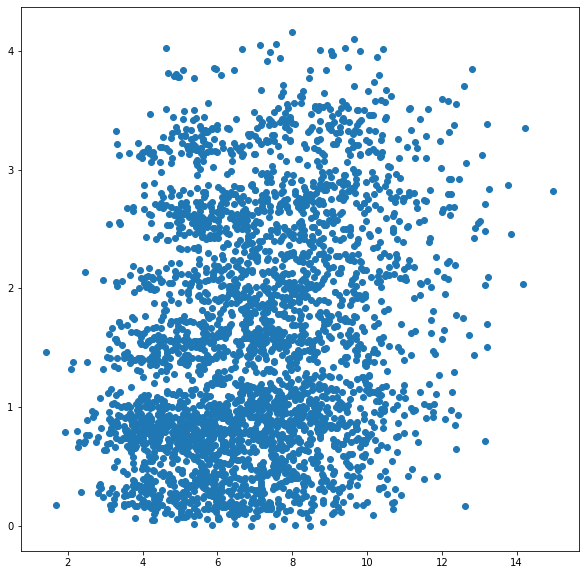

In [254]:
plt.figure(figsize=(10,10))
plt.scatter(S[::20,0],S[::20,1])

(65122, 13)